**Importing the required packages**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

**Loding the dataset**

In [2]:
col_names = [ 'id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [3]:
data = pd.read_csv("/content/breast-cancer-wisconsin.data",names = col_names )

In [4]:
data.head() # printing the first five rows

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.tail() # printing the last five rows

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
# shape of the dataframe
data.shape

(699, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id number                 699 non-null    int64 
 1   Clump Thickness           699 non-null    int64 
 2   Uniformity of Cell Size   699 non-null    int64 
 3   Uniformity of Cell Shape  699 non-null    int64 
 4   Marginal Adhesion         699 non-null    int64 
 5   Single Cell Size          699 non-null    int64 
 6   Bare Nuclei               699 non-null    object
 7   Bland Chromatin           699 non-null    int64 
 8   Normal Nucleoli           699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
# Convert object column to int dtype.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'],errors='coerce')

In [9]:
data.isnull().sum().sum() # checking null count

16

In [10]:
data['Bare Nuclei'].fillna(data['Bare Nuclei'].mode()[0], inplace=True) # filling null count with mode value

In [11]:
data.isna().sum()

id number                   0
Clump Thickness             0
Uniformity of Cell Size     0
Uniformity of Cell Shape    0
Marginal Adhesion           0
Single Cell Size            0
Bare Nuclei                 0
Bland Chromatin             0
Normal Nucleoli             0
Mitoses                     0
Class                       0
dtype: int64

In [12]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int) # converting float to int

In [13]:
# getting the statistical measures of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [14]:
# lets print the count of target 2 for benign, 4 for malignant
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [15]:
# taking all the independent values in x and target value in y
x = data.drop(columns = ['id number','Class'],axis = 1)
y = data['Class']

In [16]:
# printing x
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [17]:
# printing y
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

**Train Test Split**

In [18]:
# splitting  the data into train and test in 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

In [19]:
# shape of training and testing datasets
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(559, 9) (140, 9) (559,) (140,)


In [20]:
x.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Cell Size',
       'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'],
      dtype='object')

model building

In [21]:
model_v2 = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
model_v2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3)

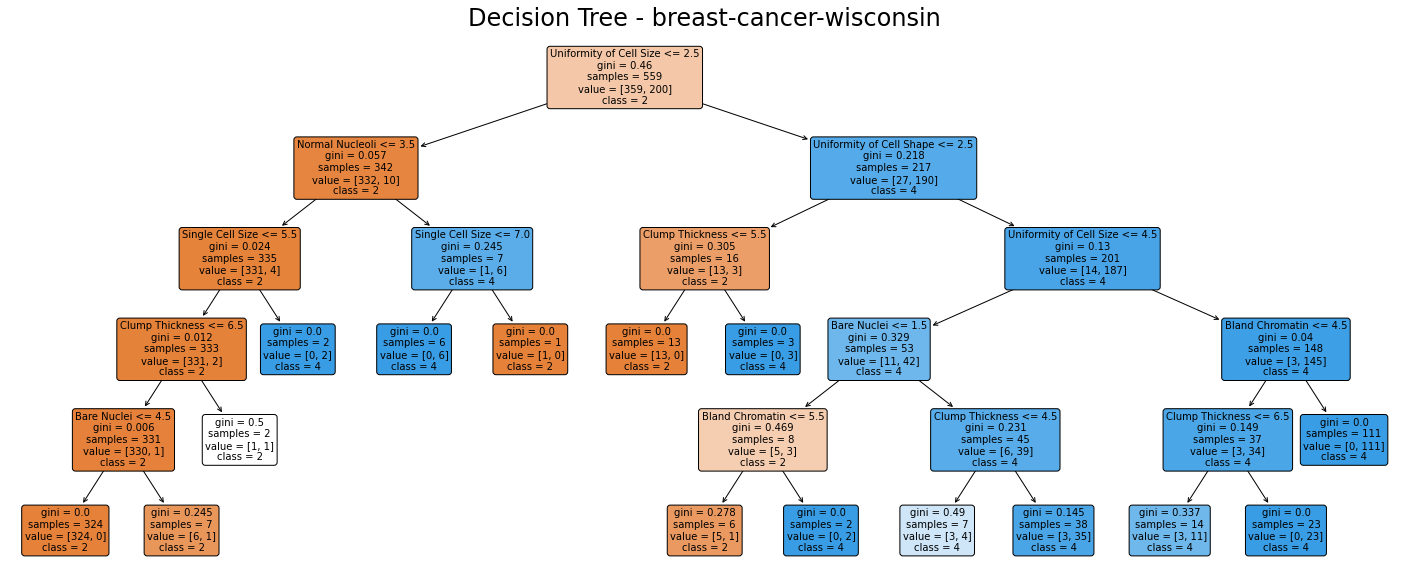

In [22]:
fig, axe = plt.subplots(figsize=(25,10))
tree.plot_tree(model_v2,fontsize=10,
               feature_names = x.columns, 
               class_names=['2','4'],
               rounded=True, 
               filled = True)
plt.rcParams.update({'font.size': 20})
plt.title("Decision Tree - breast-cancer-wisconsin")
plt.show()

Model Evaluation

In [23]:
Y_pred = model_v2.predict(X_test) 
print("accuracy_score using sklearn function",accuracy_score(Y_test, Y_pred))

accuracy_score using sklearn function 0.9214285714285714


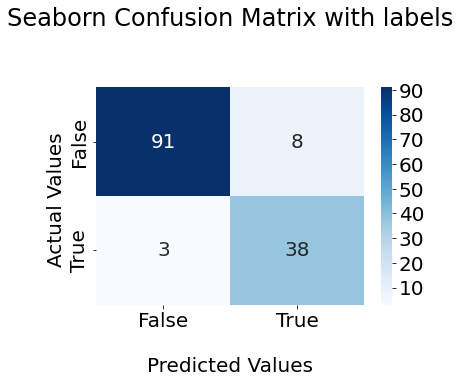

In [24]:
cf_matrix = confusion_matrix(Y_test, Y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.rcParams.update({'font.size': 5})

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()